# Types of Learning

<img src="img/learning_types.jpeg" width=900>

# Introduction to Reinforcement Learning

<img src="img/rl_1.png" width=700>
</br>

<img src="img/rl_2.png" width=700>

# Q Learning

<img src="img/q_learning_process.png" height=600>


### New Q value is updated by the weighted sum of `current Q value` and `New value` 

$\Large \color{yellow}Q^{new}(s_t, a_t) \leftarrow (1-\alpha)Q(s_t, a_t) + \alpha\Big[r_t +\gamma \max\limits_{a}Q(s_{t+1}, a)\Big ] = Q(s_t, a_t) + \alpha\Big[r_t +\gamma \max\limits_{a} Q (s_{t+1}, a) - Q(s_t, a_t)\Big ]$


<img src="./img/q_learning.jpg">

### How to generate and update Q table


<img src="./img/q_table.png">

# Q Learning with FrozenLake

The goal of this game is `to go from the starting state (S) to the goal state (G)` by walking only on frozen tiles (F) and avoid holes (H).

<img src="img/frozen_lake.png" width=400>



## Step -1: Install the dependencies

- <span style="color:yellow"> pip install gym </span>

## Step 0: Import the dependencies 📚
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [22]:
import numpy as np
import gym
import random

## Step 1: Create the environment 🎮


In [23]:
env = gym.make("FrozenLake-v1", map_name = "8x8", render_mode = "ansi", is_slippery=False)
env.reset()

print(env.render())

print(env.step(2))  #Right
print(env.render())

print(env.step(0))  #Left
print(env.render())

print(env.step(1))  #Down
print(env.render())

print(env.step(3))  #Up
print(env.render())


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

(1, 0.0, False, False, {'prob': 1.0})
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

(0, 0.0, False, False, {'prob': 1.0})
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

(8, 0.0, False, False, {'prob': 1.0})
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

(0, 0.0, False, False, {'prob': 1.0})
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [24]:
action_size = env.action_space.n
state_size = env.observation_space.n

print(action_size, state_size)

4 64


In [25]:
# Create our Q table with state_size rows and action_size columns (64x4)
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 3: Create the hyperparameters ⚙️
- Here, we'll specify the hyperparameters

In [26]:
total_episodes = 2000  # 총 에피소드 수
learning_rate = 0.01  # 학습률
max_steps = 99  # 에피소드 당 최대 단계 수
gamma = 0.99  # 할인율

# 탐험(Exploration) 관련 파라미터
epsilon = 1.0  # 탐험 비율
max_epsilon = 0.9  # 시작할 때의 탐험 확률
min_epsilon = 0.001  # 최소 탐험 확률
decay_rate = 0.005  # 탐험 확률을 감소시키는 지수 감소율

## Step 4: Solve the problem using Q-learning

In [27]:
qtable = np.zeros((state_size, action_size))  # 각 상태와 행동 조합에 대한 Q-value를 저장하는 테이블

rewards = []  # 보상들을 저장할 리스트

for episode in range(total_episodes):
    state = env.reset()[0]  # 환경 초기화 후 초기 상태 설정
    
    for _ in range(max_steps):
        # 3. 현재 상태에서 행동 선택 (a)
        # Q-value가 가장 높은 행동 중에서 무작위로 선택
        action = np.random.choice(np.where(qtable[state] == qtable[state].max())[0])
        
        # 행동을 취하고 새로운 상태와 보상 관찰
        new_state, reward, done, _, _ = env.step(action)

        # Temporal Difference Error(TD 오차) 계산
        td = reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        # Q(s,a) 값 업데이트: Q(s,a) = Q(s,a) + 학습률 * [보상 + 감마 * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        state = new_state  # 새로운 상태로 업데이트
        
        # 만약 에피소드 종료(done == True) 또는 최대 단계에 도달하면 에피소드 종료
        if done == True:
            break

print(np.round(qtable, 2))  # Q-table 출력


[[0.   0.   0.21 0.  ]
 [0.   0.   0.3  0.  ]
 [0.   0.4  0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.52 0.  ]
 [0.   0.   0.63 0.  ]
 [0.   0.   0.73 0.  ]
 [0.   0.81 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.88 0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.95 0.  ]
 [0.   0.97 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.  

## Step 5: Use our Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [28]:
env.reset()  # 환경 초기화

for episode in range(2):
    state = env.reset()[0]  # 초기 상태 설정
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):        
        # Q-table을 기반으로 최대 예상 미래 보상을 가진 행동(인덱스) 선택
        action = np.argmax(qtable[state,:])
        
        # 선택한 행동을 환경에 적용하고 새로운 상태, 보상 관찰
        new_state, reward, done, _, _ = env.step(action)
        print(f'state:{state}, action:{action}, reward:{reward}, new_state:{new_state}')
        
        if done:
            # 마지막 상태를 출력하여 목표에 도달했는지 또는 구멍에 빠졌는지 확인
            #env.render()
            if new_state == 15:
                print("목표에 도달했습니다. 🏆")
            else:
                print("구멍에 빠졌습니다. ☠️")
            
            # 에이전트가 목표에 도달하기까지 걸린 단계 수 출력
            print("걸린 단계 수", step)
            
            break
        state = new_state  # 새로운 상태로 업데이트
env.close()


****************************************************
EPISODE  0
state:0, action:2, reward:0.0, new_state:1
state:1, action:2, reward:0.0, new_state:2
state:2, action:1, reward:0.0, new_state:10
state:10, action:2, reward:0.0, new_state:11
state:11, action:2, reward:0.0, new_state:12
state:12, action:2, reward:0.0, new_state:13
state:13, action:1, reward:0.0, new_state:21
state:21, action:2, reward:0.0, new_state:22
state:22, action:1, reward:0.0, new_state:30
state:30, action:2, reward:0.0, new_state:31
state:31, action:1, reward:0.0, new_state:39
state:39, action:1, reward:0.0, new_state:47
state:47, action:1, reward:0.0, new_state:55
state:55, action:1, reward:1.0, new_state:63
구멍에 빠졌습니다. ☠️
걸린 단계 수 13
****************************************************
EPISODE  1
state:0, action:2, reward:0.0, new_state:1
state:1, action:2, reward:0.0, new_state:2
state:2, action:1, reward:0.0, new_state:10
state:10, action:2, reward:0.0, new_state:11
state:11, action:2, reward:0.0, new_state:12
st

In [29]:
import cv2
env = gym.make("FrozenLake-v1", map_name="8x8", render_mode="rgb_array", is_slippery=False)
cv2.namedWindow('FrozenLake')

while True:
    state = env.reset()[0]  # 환경 초기화 후 초기 상태 설정
    for step in range(max_steps):  # 최대 단계 수까지 반복
        action = np.argmax(qtable[state])  # Q-table을 기반으로 최선의 행동 선택
        new_state, reward, done, terminated, _ = env.step(action)  # 선택한 행동 적용
        screen = env.render()  # 환경을 렌더링하여 화면 저장
        screen = cv2.cvtColor(screen, cv2.COLOR_RGB2BGR)  # OpenCV 형식으로 변환
        cv2.imshow('FrozenLake', screen)  # 변환된 화면을 OpenCV 창에 표시
        if cv2.waitKey(200) == 27:  # ESC 키를 누르면 반복문 종료
            break
        if done or terminated:  # 에피소드가 종료되면 반복문 종료
            break
        state = new_state  # 새로운 상태로 업데이트

    if cv2.waitKey(1000) == 27:  # ESC 키를 한 번 더 누르면 전체 루프 종료
        break

env.close()  # 환경 종료
cv2.destroyAllWindows()  # OpenCV 창 모두 닫기

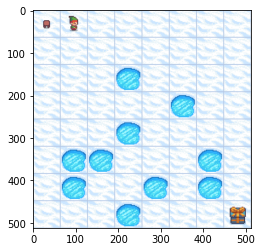

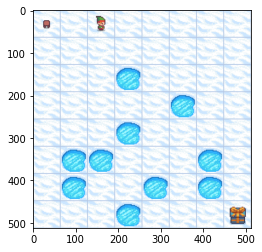

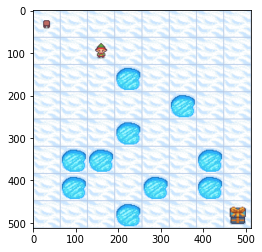

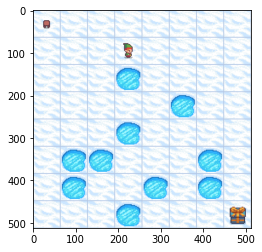

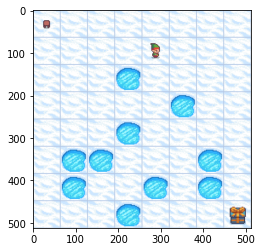

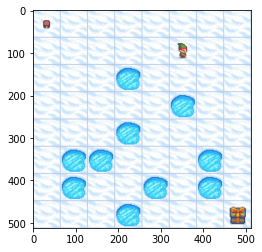

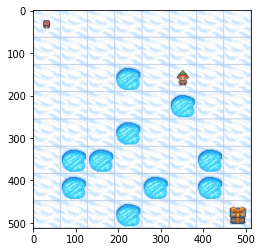

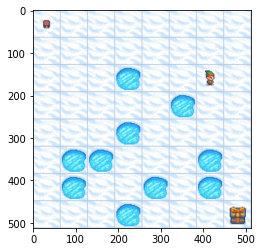

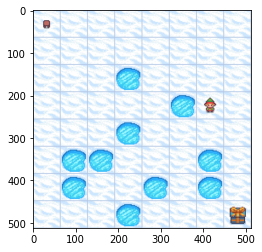

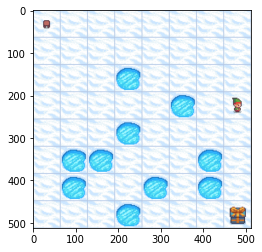

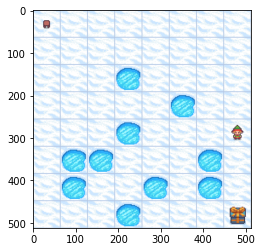

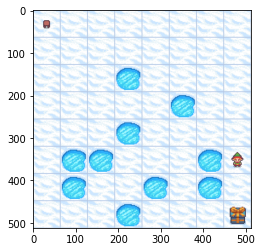

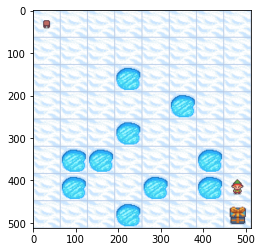

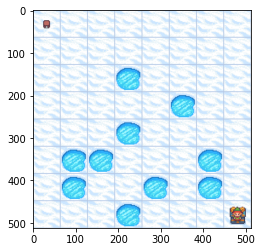

In [30]:
import matplotlib.pyplot as plt
env = gym.make("FrozenLake-v1", map_name="8x8", render_mode="rgb_array", is_slippery=False)
state = env.reset()[0]
for step in range(max_steps):
    action = np.argmax(qtable[state])
    new_state, reward, done, terminated, _ = env.step(action)
    screen = env.render()
    plt.imshow(screen)
    plt.show()
    if done or terminated:
        break
    state = new_state
env.close()

In [31]:
# List of rewards
rewards = []  # 보상들을 저장할 리스트

for episode in range(total_episodes):
    state = env.reset()[0]  # 환경 초기화 후 초기 상태 설정
    step = 0
    done = False
    total_rewards = 0  # 에피소드 동안 얻는 총 보상

    for step in range(max_steps):
        # 3. 현재 환경 상태에서 행동 선택 (ε-greedy 알고리즘)
        eps = random.uniform(0, 1)  # 0과 1 사이의 무작위 값을 생성하여 탐험/활용 결정
        
        # ε 값에 따라 탐험(Exploration) 또는 활용(Exploitation) 선택
        if eps > epsilon:  # ε보다 무작위 값이 크면 활용(가장 큰 Q 값 선택)
            action = np.argmax(qtable[state, :])
        else:
            action = env.action_space.sample()  # 그렇지 않으면 무작위로 행동 선택
        
        # 선택한 행동을 환경에 적용하고 새로운 상태, 보상 관찰
        new_state, reward, done, _, _ = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        # Q-value 업데이트
        qtable[state, action] = qtable[state, action] + learning_rate * (
                    reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward  # 총 보상 업데이트

        if episode == total_episodes - 1:
            print(f'state:{state}, action:{action}, reward:{reward}, new_state:{new_state}')

        state = new_state  # 새로운 상태로 업데이트

        if done == True:
            break  # 에피소드 종료

    # ε 감소 (점점 더 많은 활용을 위해)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)  # 에피소드별 보상 저장

# 평균 보상 출력
print("에피소드별 평균 보상: " + str(sum(rewards) / total_episodes))
print(qtable)  # 학습된 Q-table 출력

state:0, action:2, reward:0.0, new_state:1
state:1, action:2, reward:0.0, new_state:2
state:2, action:1, reward:0.0, new_state:10
state:10, action:2, reward:0.0, new_state:11
state:11, action:2, reward:0.0, new_state:12
state:12, action:2, reward:0.0, new_state:13
state:13, action:1, reward:0.0, new_state:21
state:21, action:2, reward:0.0, new_state:22
state:22, action:1, reward:0.0, new_state:30
state:30, action:2, reward:0.0, new_state:31
state:31, action:1, reward:0.0, new_state:39
state:39, action:1, reward:0.0, new_state:47
state:47, action:1, reward:0.0, new_state:55
state:55, action:1, reward:1.0, new_state:63
에피소드별 평균 보상: 0.8705
[[2.20077177e-01 7.03452921e-02 8.77203384e-01 2.86644841e-01]
 [2.03543383e-01 1.80888828e-01 8.86246720e-01 2.79124884e-01]
 [2.62924160e-01 8.95282275e-01 9.28350227e-02 2.62899155e-01]
 [9.15563776e-02 4.46363176e-01 2.08721690e-02 3.06388679e-02]
 [1.48247624e-02 3.39360630e-01 1.11423159e-02 3.98490637e-03]
 [8.94364319e-03 3.05140616e-01 1.978914